C:\Users\pksmi\Anaconda3\envs\AIenv1\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


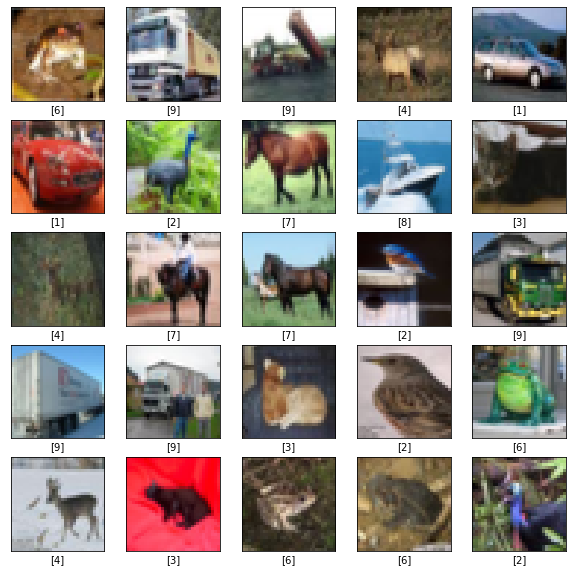

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
flatten (Flatten)            (None, 28800)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                288010    
Total params: 288,906
Trainable params: 288,906
Non-trainable params: 0
_________________________________________________________________


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(train_labels[i])
plt.show()

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)))
model.add(layers.Flatten())
model.add(layers.Dense(10))

model.build()
model.summary()


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 18s 361us/sample - loss: 1.1602 - accuracy: 0.5978 - val_loss: 1.2588 - val_accuracy: 0.5606
Epoch 2/10
50000/50000 [==============================] - 19s 370us/sample - loss: 1.0582 - accuracy: 0.6348 - val_loss: 1.2007 - val_accuracy: 0.5817
Epoch 3/10
50000/50000 [==============================] - 19s 372us/sample - loss: 0.9724 - accuracy: 0.6628 - val_loss: 1.2255 - val_accuracy: 0.5843
Epoch 4/10
50000/50000 [==============================] - 21s 422us/sample - loss: 0.9021 - accuracy: 0.6883 - val_loss: 1.2237 - val_accuracy: 0.5848
Epoch 5/10
50000/50000 [==============================] - 18s 354us/sample - loss: 0.8351 - accuracy: 0.7120 - val_loss: 1.2850 - val_accuracy: 0.5742
Epoch 6/10
50000/50000 [==============================] - 18s 367us/sample - loss: 0.7815 - accuracy: 0.7308 - val_loss: 1.3067 - val_accuracy: 0.5826
Epoch 7/10
50000/50000 [====================

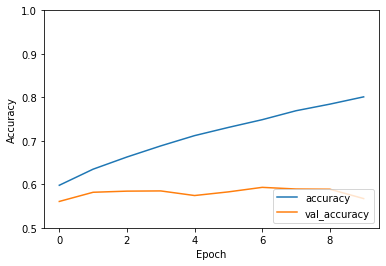

In [4]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print(test_acc)

# https://www.tensorflow.org/tutorials/keras/classification